In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

%matplotlib inline


In [3]:
user_data = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/user_data.csv')

In [4]:
logs = pd.read_csv('https://stepik.org/media/attachments/lesson/360348/logs.csv')

In [5]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [6]:
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [7]:
users_orders = pd.DataFrame(logs.query('success == True').client.value_counts()).reset_index() \
    .sort_values(['client', 'index'], ascending=[False, True])\
    .rename(columns={'index': 'client', 'client': 'successful_orders'})

In [8]:
users_orders

,client,successful_orders
4,12179,41
0,28719,41
6,36165,41
1,52870,41
2,61468,41
...,...,...
1793,99926,1
2267,99927,1
444,99931,1
1401,99973,1


In [9]:
logs.merge(user_data, on='client').query('premium == True').groupby('platform').agg({'client': 'count'})

,client
platform,
computer,150
phone,246
tablet,24


In [10]:
df = logs.merge(user_data, on='client')

In [11]:
df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [12]:
df.query('success == True').client

0       61468
1       61468
2       61468
3       61468
4       61468
        ...  
3432    85769
3433    81031
3435    95152
3437     8967
3438    40921
Name: client, Length: 2547, dtype: int64

/Users/Vladislav/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

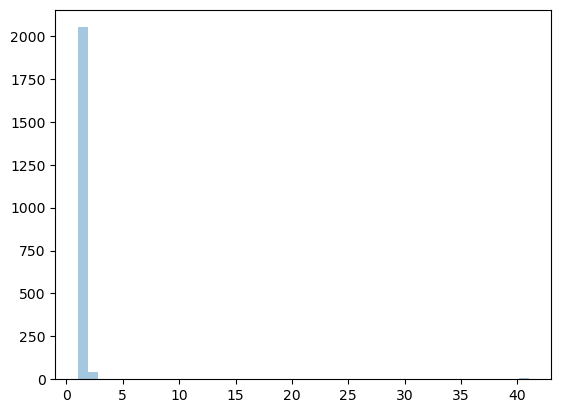

In [16]:
sns.distplot(df.query('success == True').groupby('client').agg({'success': 'count'}), kde=False)

In [17]:
a = pd.DataFrame(df.query("success == True and platform == 'computer'").age.value_counts()).reset_index() \
                    .rename(columns={'index': 'age', 'age': 'success_orders'}).sort_values('age')

In [18]:
a

,age,success_orders
40,20,11
29,21,15
47,22,8
27,23,15
5,24,26
1,25,33
32,26,14
33,27,14
0,28,49
18,29,17


<AxesSubplot:xlabel='age', ylabel='success_orders'>

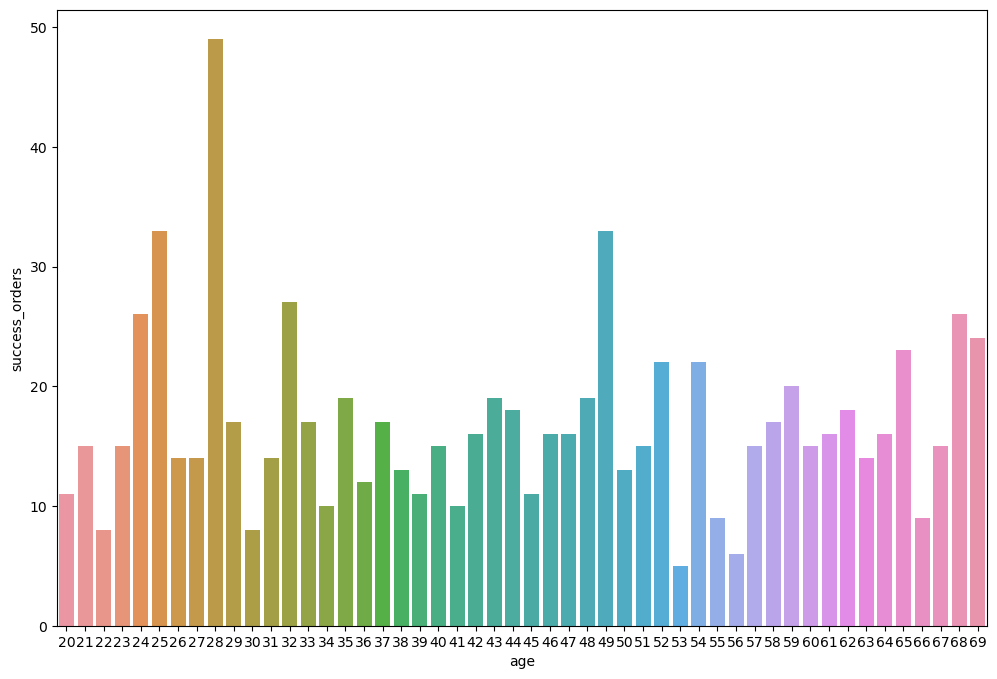

In [21]:
plt.pyplot.figure(figsize=(12, 8))
sns.barplot(x=a.age, y=a.success_orders)